# Using ESN to predict the next values of a sine wave

This is a trial project to test out the pyESN library to use Echo State Networks (ESN) for time series prediction. In this case, we would like to forecast the following values of a sine wave, based on its previous observations. We use sine waves as they can effectively capture and represent periodic, oscillating patterns, which are common in many real-world time series data.

Steps:
1. Install the pyESN library.
2. Generate synthetic time-series data (sine wave).
3. Split the data into training and testing sets.
4. Create and train the ESN.
5. Evaluate the ESN’s predictions by comparing them to the actual values.

## Step 1: Installing the libraries

In [1]:
pip install pyESN

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pyESN import ESN

## Step 2: Generating synthetic time-series data

We will use a sine wave as our data. We’ll generate 3000 data points and split them into training and testing sets.

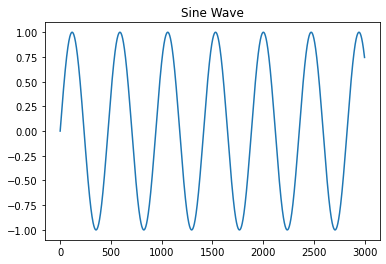

In [3]:
# Generate a sine wave as synthetic data
time_steps = np.linspace(0, 40, 3000)
sine_wave = np.sin(time_steps)

# Plot the sine wave
plt.plot(sine_wave)
plt.title("Sine Wave")
plt.show()

## Step 3: Splitting the data into train and test sets

We use 2000 points for training and the remaining 1000 points for testing.

In [5]:
train_length = 2000
test_length = 1000

train_data = sine_wave[:train_length]
test_data = sine_wave[train_length:train_length + test_length]

# Match the array size
train_data_input = train_data[:-1]  # All data points except the last one
train_data_output = train_data[1:]  # All data points except the first one (shifted by one time step)

# Normalize the data
train_min = np.min(train_data_input)
train_max = np.max(train_data_input)

train_data_normalized_input = (train_data_input - train_min) / (train_max - train_min)
train_data_normalized_output = (train_data_output - train_min) / (train_max - train_min)

## Step 4: Creating and training the ESN

Now, we set up the ESN. The reservoir size is set to 500, and the spectral radius is set to 1.25. These are commonly used values.

In [6]:
# Initialize the ESN
esn = ESN(n_inputs=1, n_outputs=1, n_reservoir=500, spectral_radius=1.25, random_state=42)

# Train the ESN on the training data
esn.fit(train_data_normalized_input.reshape(-1, 1), train_data_normalized_output.reshape(-1, 1))

# Use the ESN to predict the next values
test_data_input = test_data[:-1]
test_data_normalized_input = (test_data_input - train_min) / (train_max - train_min)
predicted_output_normalized = esn.predict(test_data_normalized_input.reshape(-1, 1))

We  now test the model’s ability to predict the next values of the sine wave based on the testing data. We use the first data point of the test set as the input and let the ESN predict subsequent values.

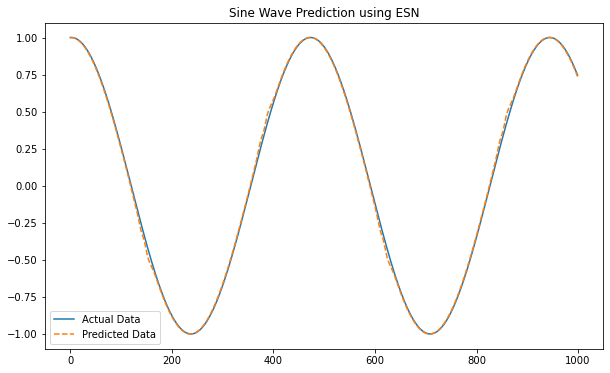

In [7]:
# Test the ESN
predicted_output = esn.predict(test_data.reshape(-1, 1))

# Plot the predicted vs actual sine wave
plt.figure(figsize=(10, 6))
plt.plot(test_data, label="Actual Data")
plt.plot(predicted_output, label="Predicted Data", linestyle="--")
plt.title("Sine Wave Prediction using ESN")
plt.legend()
plt.show()

## Step 5: Evaluating the predictions

In [8]:
# Calculate the Mean Squared Error (MSE)
mse = np.mean((predicted_output.flatten() - test_data.flatten()) ** 2)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.00031426323831697223


The MSE is very low (0.03%) which indicates that the model is performing well. This is to be expected, as the data is a sine wave with no noise.